In [1]:
# to silence NumbaDeprecationWarning
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

# although, check for the actual reason for the warning (saved links), and update if the problem is solved !!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import umap
import umap.plot

### Data import

In [3]:
df_APS = pd.read_csv('.../final_table_20240110.csv', sep=';', encoding="ISO-8859-1")

### Dimensionality reduction

In [4]:
# selection of only the disease data
diseaseOnly = df_APS.copy()
diseaseOnly = diseaseOnly.iloc[:, 6:34]

In [5]:
# dimensionality reduction with UMAP
mapper = umap.UMAP(n_neighbors=15, 
                   min_dist=0.2, 
                   metric='manhattan', 
                   random_state=4347).fit(diseaseOnly)

### Data visualization

#### 1. Main figure

For the proper visualization, some information is rearranged into single columns.

- Renaming some values

In [6]:
# to rename HT and GD for the figure legend
HTGD = df_APS.copy()   # to preserv original information in the df
HTGD = HTGD[['hashimoto', 'basedow']]

diseaseHT = {0:'other', 1:'HT'}
HTGD.replace({'hashimoto':diseaseHT}, inplace=True)

diseaseGD = {0:'other', 1:'GD'}
HTGD.replace({'basedow':diseaseGD}, inplace=True)

- Collecting the most frequent disease info into one column

In [7]:
# to collect all disease combinations
dis_comb_list = []

for i in range(len(diseaseOnly.index)):
    dis_inst = diseaseOnly.iloc[i,:]   
    dis_combs = str(dis_inst[dis_inst == 1].index)
    dis_combs = dis_combs.replace("'", "")
    dis_combs = dis_combs[6:-15]
    dis_comb_list.append(dis_combs)

In [8]:
dis_comb_list[:10]

['[hashimoto, diabetes_mellitus_1]',
 '[hashimoto, crohn]',
 '[hashimoto, vitiligo]',
 '[hashimoto, diabetes_mellitus_1, vitiligo]',
 '[basedow, diabetes_mellitus_1]',
 '[diabetes_mellitus_1, coeliakia]',
 '[basedow, RA]',
 '[hashimoto, early_gonadal_insufficiency, sjögren]',
 '[hashimoto, primer_biliaris_cholangitis]',
 '[hashimoto, diabetes_mellitus_1, hepatitis]']

In [9]:
# to add the results to the df
df_APS['combinations'] = pd.Series(dis_comb_list)

In [10]:
# to select the most frequent disease combinations
# these combinations were identified subsequently
mfreq_comb_list = ['[hashimoto, diabetes_mellitus_1]', '[hashimoto, coeliakia]', '[hashimoto, RA]', '[adrenal, hashimoto]', 
                   '[hashimoto, vitiligo]', '[basedow, RA]', '[basedow, coeliakia]', '[basedow, diabetes_mellitus_1]', 
                   '[hashimoto, autoimmun_gastritis]', '[hashimoto, SLE]', '[hashimoto, sjögren]']

dis_comb_list_mfreq = []

for combination in dis_comb_list:
    if combination in mfreq_comb_list:
        dis_comb_list_mfreq.append(combination)
    else:
        dis_comb_list_mfreq.append('other')

In [11]:
dis_comb_list_mfreq[:10]

['[hashimoto, diabetes_mellitus_1]',
 'other',
 '[hashimoto, vitiligo]',
 'other',
 '[basedow, diabetes_mellitus_1]',
 'other',
 '[basedow, RA]',
 'other',
 'other',
 'other']

In [12]:
# to add the results to the df
df_APS['most_freq_combinations'] = pd.Series(dis_comb_list_mfreq)

- All APS category info into one column

In [13]:
APS_cats = df_APS.copy()
APS_cats = APS_cats.iloc[:, [36, 37, 38, 43]]
APS_cats.head()

,APS I.,APS II.,APS III.,APS IV.
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [14]:
# to collect all APS category info
APS_cat_list = []

for i in range(len(APS_cats.index)):
    APS_inst = APS_cats.iloc[i,:]
    APS_actual = str(APS_inst[APS_inst == 1].index)
    APS_actual = APS_actual[8:-20]
    APS_cat_list.append(APS_actual)

In [15]:
# to add the results to the df
df_APS['APS_category'] = pd.Series(APS_cat_list)

- All APS III subcategory info into one column

In [16]:
APSIII_cats = df_APS.copy()
APSIII_cats = APSIII_cats.iloc[:, 39:43]
APSIII_cats.head()

,APS III/a,APS III/b,APS III/c,APS III/d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [17]:
# to collect all APS III subcategory info
APSIII_cat_list = []

for i in range(len(APSIII_cats.index)):
    APSIII_inst = APSIII_cats.iloc[i,:]
    if APSIII_inst.sum() == 1:    # apart from APS III, the sum will be 0 with other categories
        APSIII_actual = str(APSIII_inst[APSIII_inst == 1].index)
        APSIII_actual = APSIII_actual[8:-19]
        APSIII_cat_list.append(APSIII_actual)
    else:
        APSIII_cat_list.append("other")

In [18]:
# to add the results to the df
df_APS['APSIII_category'] = pd.Series(APSIII_cat_list)

#### The actual figure

Text(0.521, 0.348, 'F')

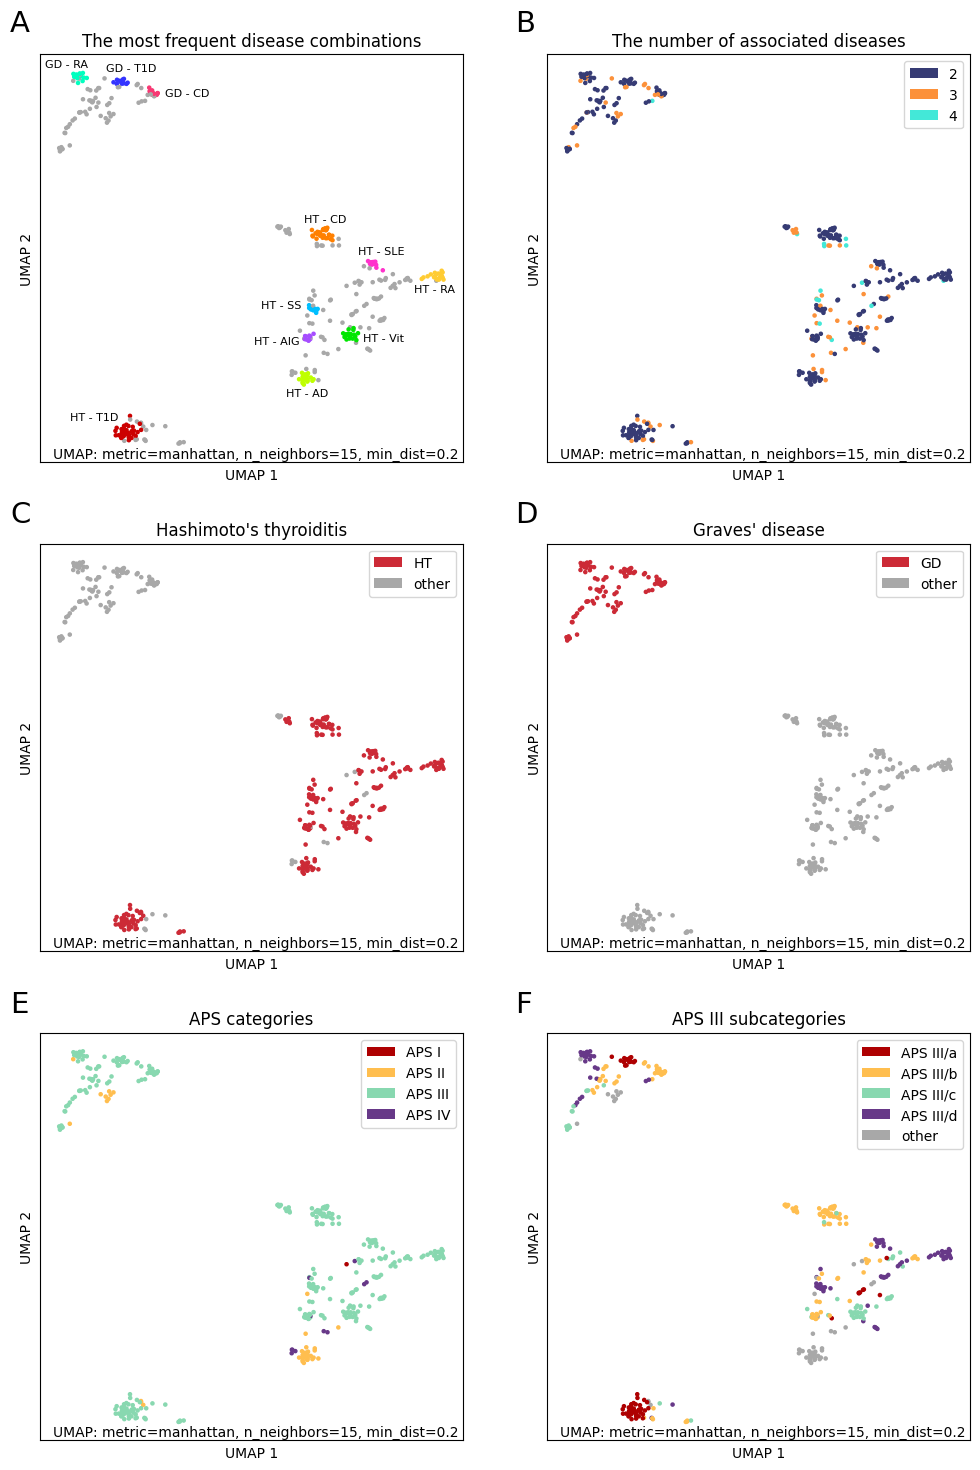

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,18))

cmap1 = {'[hashimoto, diabetes_mellitus_1]':'#cc0000', 
          '[hashimoto, coeliakia]':'#ff8000', 
          '[hashimoto, RA]':'#ffcc33', 
          '[adrenal, hashimoto]':'#bfff00', 
          '[hashimoto, vitiligo]':'#00e600', 
          '[basedow, RA]':'#00ffbf', 
          '[basedow, coeliakia]':'#f83873',
          '[basedow, diabetes_mellitus_1]':'#3333ff', 
          '[hashimoto, autoimmun_gastritis]':'#a64dff', 
          '[hashimoto, SLE]':'#ff33cc', 
          '[hashimoto, sjögren]':'#00bfff', 
          'other':'#a8a8a8'}
umap.plot.points(mapper, labels=df_APS['most_freq_combinations'], color_key=cmap1, ax=ax[0][0], show_legend=False)
ax[0][0].set_title('The most frequent disease combinations')
ax[0][0].set_xlabel('UMAP 1')
ax[0][0].set_ylabel('UMAP 2')

cmap2 = {2:'#363b74', 3:'#fc913a', 4:'#43e8d8'}
umap.plot.points(mapper, labels=df_APS['assoc_disease_no'], color_key=cmap2, ax=ax[0][1])
ax[0][1].set_title('The number of associated diseases')
ax[0][1].set_xlabel('UMAP 1')
ax[0][1].set_ylabel('UMAP 2')

cmap3 = {'other':'#a8a8a8', 'HT':'#cc2a36'}
umap.plot.points(mapper, labels=HTGD['hashimoto'], color_key=cmap3, ax=ax[1][0])
ax[1][0].set_title('Hashimoto\'s thyroiditis')
ax[1][0].set_xlabel('UMAP 1')
ax[1][0].set_ylabel('UMAP 2')

cmap4 = {'other':'#a8a8a8', 'GD':'#cc2a36'}
umap.plot.points(mapper, labels=HTGD['basedow'], color_key=cmap4, ax=ax[1][1])
ax[1][1].set_title('Graves\' disease')
ax[1][1].set_xlabel('UMAP 1')
ax[1][1].set_ylabel('UMAP 2')

cmap5 = {'APS I':'#ae0001', 'APS II':'#ffbe4f', 'APS III':'#88d8b0', 'APS IV':'#673888'}
umap.plot.points(mapper, labels=df_APS['APS_category'], color_key=cmap5, ax=ax[2][0])
ax[2][0].set_title('APS categories')
ax[2][0].set_xlabel('UMAP 1')
ax[2][0].set_ylabel('UMAP 2')

cmap6 = {'APS III/a':'#ae0001', 'APS III/b':'#ffbe4f', 'APS III/c':'#88d8b0', 'APS III/d':'#673888', 'other':'#a8a8a8'}
umap.plot.points(mapper, labels=df_APS['APSIII_category'], color_key=cmap6, ax=ax[2][1])
ax[2][1].set_title('APS III subcategories')
ax[2][1].set_xlabel('UMAP 1')
ax[2][1].set_ylabel('UMAP 2')

# text for A
fig.text(x=0.1295, y=0.873, s='GD - RA', fontsize=8)
fig.text(x=0.18, y=0.8705, s='GD - T1D', fontsize=8)
fig.text(x=0.229, y=0.857, s='GD - CD', fontsize=8)
fig.text(x=0.15, y=0.677, s='HT - T1D', fontsize=8)
fig.text(x=0.345, y=0.787, s='HT - CD', fontsize=8)
fig.text(x=0.39, y=0.769, s='HT - SLE', fontsize=8)
fig.text(x=0.437, y=0.748, s='HT - RA', fontsize=8)
fig.text(x=0.3095, y=0.739, s='HT - SS', fontsize=8)
fig.text(x=0.303, y=0.719, s='HT - AIG', fontsize=8)
fig.text(x=0.33, y=0.69, s='HT - AD', fontsize=8)
fig.text(x=0.3945, y=0.721, s='HT - Vit', fontsize=8)

# for lettering the figure
fig.text(x=0.1, y=0.893, s='A', fontsize=21)
fig.text(x=0.1, y=0.62, s='C', fontsize=21)
fig.text(x=0.1, y=0.348, s='E', fontsize=21)
fig.text(x=0.521, y=0.893, s='B', fontsize=21)
fig.text(x=0.521, y=0.62, s='D', fontsize=21)
fig.text(x=0.521, y=0.348, s='F', fontsize=21)

#fig.savefig('UMAPs_APS.tiff', bbox_inches='tight', dpi=300)
#fig.savefig('UMAPs_APS.pdf', bbox_inches='tight', dpi=300)

<br>

#### 2. Supplementary figure

As for the main figure, some information is changed or rearranged here as well for the visualization.

- Renaming some values

In [22]:
# to rename the rest of the most frequent diseases for the supplementary figure's legends
freq_diseases = ['diabetes_mellitus_1', 'coeliakia', 'RA', 'adrenal', 'vitiligo', 'autoimmun_gastritis', 'sjögren', 'SLE']
abbrevs = ['T1D', 'CD', 'RA', 'AD', 'Vit', 'AIG', 'SS', 'SLE']

SupDiseases = df_APS.copy()   # to preserv original info in the df
SupDiseases = SupDiseases[freq_diseases]

for index, i in enumerate(freq_diseases):
    legendDict = {0:'other', 1:abbrevs[index]}
    SupDiseases.replace({i:legendDict}, inplace=True)

In [23]:
# to rename the values for the figure legend
sexes = {1:'men', 2:'women'}

sexesData = df_APS.copy()   # to preserv original info in the df
sexesData = sexesData[['gender']]
sexesData.replace({'gender':sexes}, inplace=True)

- Separation of instances based on age (under or over 18)

In [24]:
# to create a list with age info
age_dist_18_list = []

for i in range(len(df_APS.index)):
    if df_APS['age_at_disease_onset'][i] == -1:
        age_dist_18_list.append('unknown')
    elif df_APS['age_at_disease_onset'][i] < 18:
        age_dist_18_list.append('under 18')
    else:
        age_dist_18_list.append('over 18')

In [25]:
# to add the results to the df
df_APS['age_distribution_18'] = pd.Series(age_dist_18_list)

#### The actual figure

Text(0.383, 0.285, 'C')

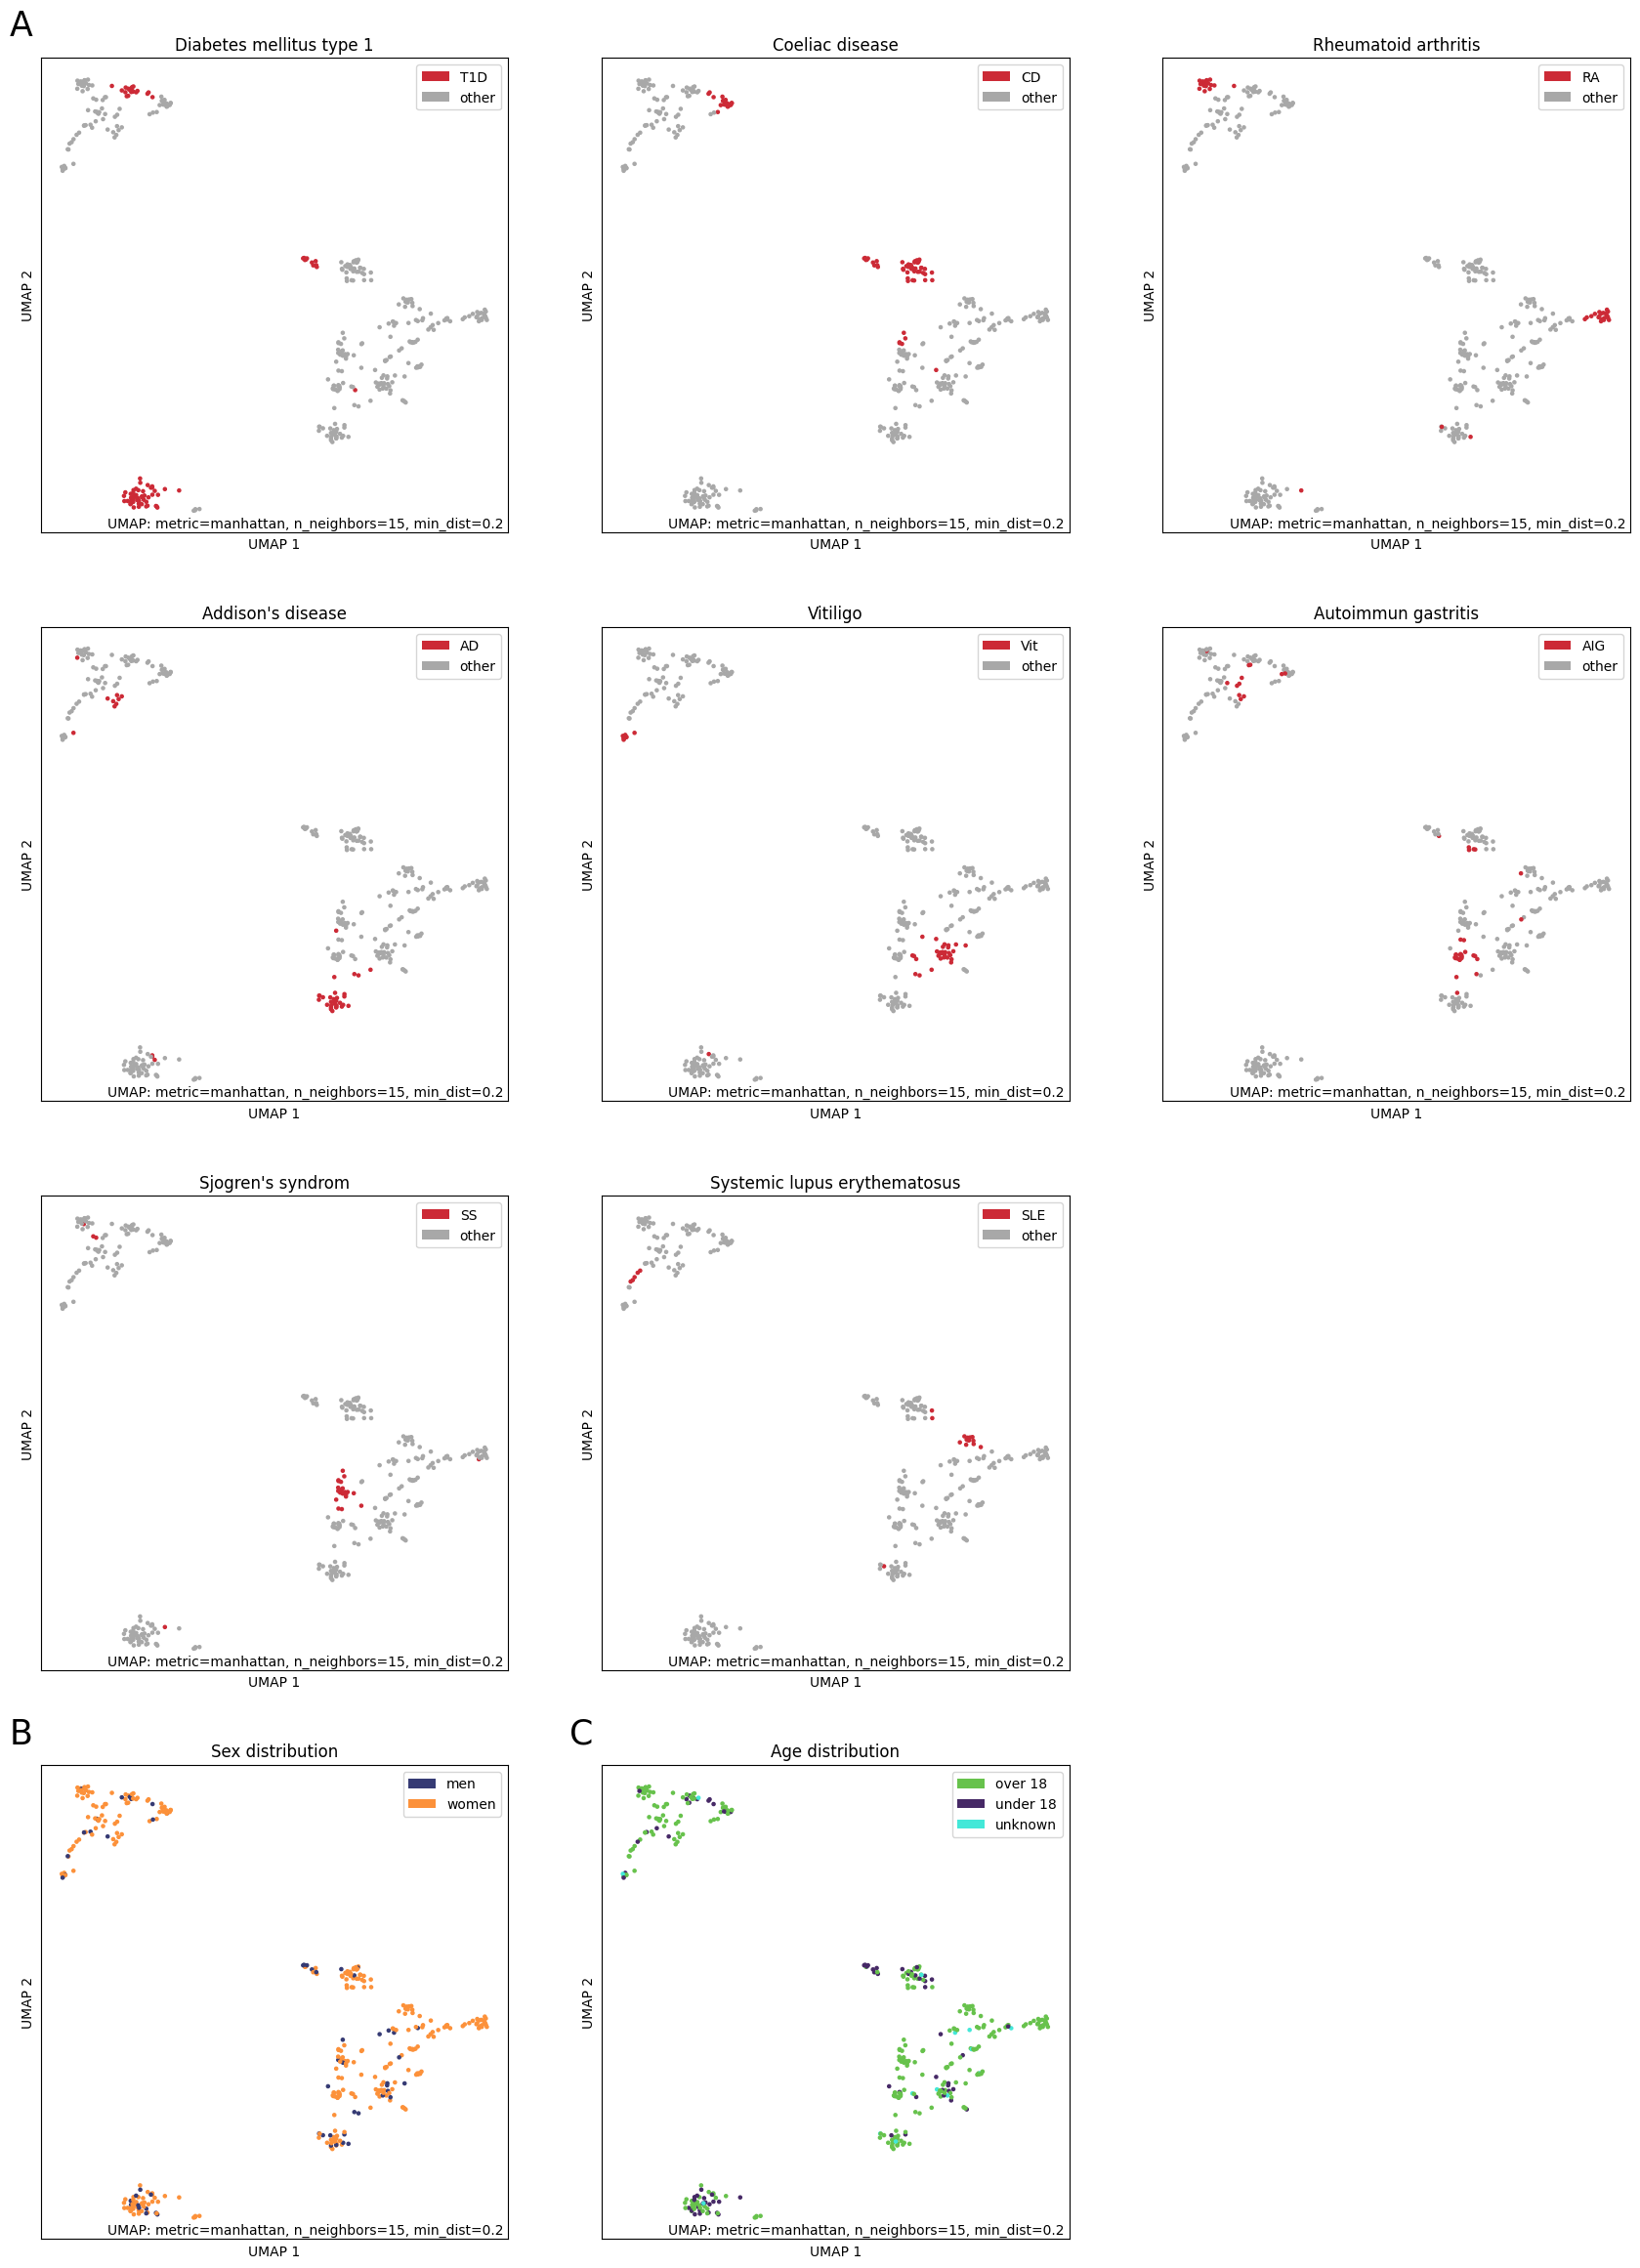

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(21,29))

cmap1 = {'other':'#a8a8a8', 'T1D':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['diabetes_mellitus_1'], color_key=cmap1, ax=ax[0][0])
ax[0][0].set_title('Diabetes mellitus type 1')
ax[0][0].set_xlabel('UMAP 1')
ax[0][0].set_ylabel('UMAP 2')

cmap2 = {'other':'#a8a8a8', 'CD':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['coeliakia'], color_key=cmap2, ax=ax[0][1])
ax[0][1].set_title('Coeliac disease')
ax[0][1].set_xlabel('UMAP 1')
ax[0][1].set_ylabel('UMAP 2')

cmap3 = {'other':'#a8a8a8', 'RA':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['RA'], color_key=cmap3, ax=ax[0][2])
ax[0][2].set_title('Rheumatoid arthritis')
ax[0][2].set_xlabel('UMAP 1')
ax[0][2].set_ylabel('UMAP 2')

cmap4 = {'other':'#a8a8a8', 'AD':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['adrenal'], color_key=cmap4, ax=ax[1][0])
ax[1][0].set_title('Addison\'s disease')
ax[1][0].set_xlabel('UMAP 1')
ax[1][0].set_ylabel('UMAP 2')

cmap5 = {'other':'#a8a8a8', 'Vit':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['vitiligo'], color_key=cmap5, ax=ax[1][1])
ax[1][1].set_title('Vitiligo')
ax[1][1].set_xlabel('UMAP 1')
ax[1][1].set_ylabel('UMAP 2')

cmap6 = {'other':'#a8a8a8', 'AIG':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['autoimmun_gastritis'], color_key=cmap6, ax=ax[1][2])
ax[1][2].set_title('Autoimmun gastritis')
ax[1][2].set_xlabel('UMAP 1')
ax[1][2].set_ylabel('UMAP 2')

cmap7 = {'other':'#a8a8a8', 'SS':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['sjögren'], color_key=cmap7, ax=ax[2][0])
ax[2][0].set_title('Sjogren\'s syndrom')
ax[2][0].set_xlabel('UMAP 1')
ax[2][0].set_ylabel('UMAP 2')

cmap8 = {'other':'#a8a8a8', 'SLE':'#cc2a36'}
umap.plot.points(mapper, labels=SupDiseases['SLE'], color_key=cmap8, ax=ax[2][1])
ax[2][1].set_title('Systemic lupus erythematosus')
ax[2][1].set_xlabel('UMAP 1')
ax[2][1].set_ylabel('UMAP 2')

cmap9 = {'men':'#363b74', 'women':'#fc913a'}
umap.plot.points(mapper, labels=sexesData['gender'], color_key=cmap9, ax=ax[3][0])
ax[3][0].set_title('Sex distribution')
ax[3][0].set_xlabel('UMAP 1')
ax[3][0].set_ylabel('UMAP 2')

cmap10 = {'unknown':'#43e8d8', 'under 18':'#462966', 'over 18':'#67c24c'}
umap.plot.points(mapper, labels=df_APS['age_distribution_18'], color_key=cmap10, ax=ax[3][1])
ax[3][1].set_title('Age distribution')
ax[3][1].set_xlabel('UMAP 1')
ax[3][1].set_ylabel('UMAP 2')

ax[2][2].set_visible(False)
ax[3][2].set_visible(False)

# for lettering the figure
fig.text(x=0.11, y=0.888, s='A', fontsize=25)
fig.text(x=0.11, y=0.285, s='B', fontsize=25)
fig.text(x=0.383, y=0.285, s='C', fontsize=25)

#fig.savefig('Suppl_UMAPs_APS.tiff', bbox_inches='tight', dpi=300)
#fig.savefig('Suppl_UMAPs_APS.pdf', bbox_inches='tight', dpi=300)